In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(r'C:\Users\praveen\Downloads\Stock_Price_Prediction\dataset\EW-MAX.csv')

In [39]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


In [41]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [42]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600
4391,2017/9/8,112.300003,114.790001,112.010002,113.190002,113.190002,1611700


In [14]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [16]:
pd.isnull(df).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

columns_order = ['day', 'month', 'year','Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']
df = df[columns_order]  # only if these columns exist in your dataset

print(df.head())

   day  month  year      Open      High       Low     Close  Adj_Close  \
0   27      3  2000  3.812500  4.156250  3.812500  4.125000   4.125000   
1   28      3  2000  4.125000  4.125000  4.000000  4.015625   4.015625   
2   29      3  2000  4.000000  4.031250  3.953125  4.000000   4.000000   
3   30      3  2000  4.000000  4.000000  3.843750  3.843750   3.843750   
4   31      3  2000  3.734375  3.734375  3.390625  3.390625   3.390625   

    Volume  
0  3675600  
1  1077600  
2   437200  
3  1883600  
4  7931600  


In [18]:
x = df[['day','month','year','Open', 'High', 'Low', 'Volume']]

In [19]:
x

,day,month,year,Open,High,Low,Volume
0,27,3,2000,3.812500,4.156250,3.812500,3675600
1,28,3,2000,4.125000,4.125000,4.000000,1077600
2,29,3,2000,4.000000,4.031250,3.953125,437200
3,30,3,2000,4.000000,4.000000,3.843750,1883600
4,31,3,2000,3.734375,3.734375,3.390625,7931600
...,...,...,...,...,...,...,...
4387,1,9,2017,113.790001,114.099998,112.790001,950000
4388,5,9,2017,112.519997,113.529999,111.160004,1805200
4389,6,9,2017,112.029999,112.489998,110.250000,2136700
4390,7,9,2017,112.459999,112.900002,112.000000,1251600


In [20]:
y = df['Close']

In [21]:
y

0         4.125000
1         4.015625
2         4.000000
3         3.843750
4         3.390625
           ...    
4387    113.309998
4388    111.870003
4389    112.230003
4390    112.339996
4391    113.190002
Name: Close, Length: 4392, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [23]:
x_train.shape

(3952, 7)

In [24]:
x_test.shape

(440, 7)

In [25]:
y_train.shape

(3952,)

In [26]:
y_test.shape

(440,)

In [27]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

model_1 = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)
print(f"Accuracy: {r2_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 99.99%


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

model = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=2))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Accuracy: {r2_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 96.05%


In [29]:
prediction=model_1.predict([[27,3,2000,3.812500,4.156250,3.812500,3675600]])

C:\Users\praveen\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
print(prediction)

[4.09665682]


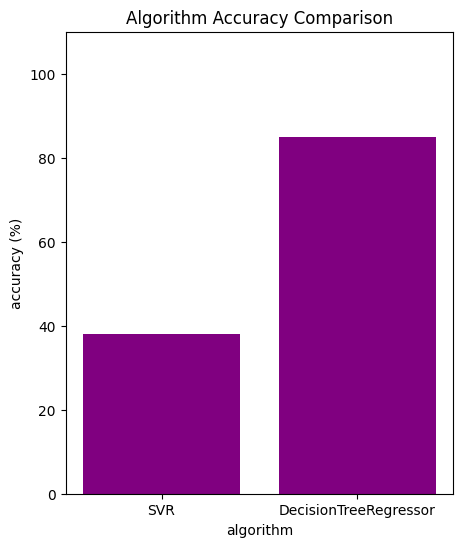

In [31]:
import matplotlib.pyplot as plt

algorithm=['SVR','DecisionTreeRegressor']
accuracies=[38,85]
plt.figure(figsize=(5,6))
plt.bar(algorithm, accuracies, color=['purple'])
plt.xlabel('algorithm')
plt.ylabel('accuracy (%)')
plt.title('Algorithm Accuracy Comparison')
plt.ylim(0,110)
plt.show()

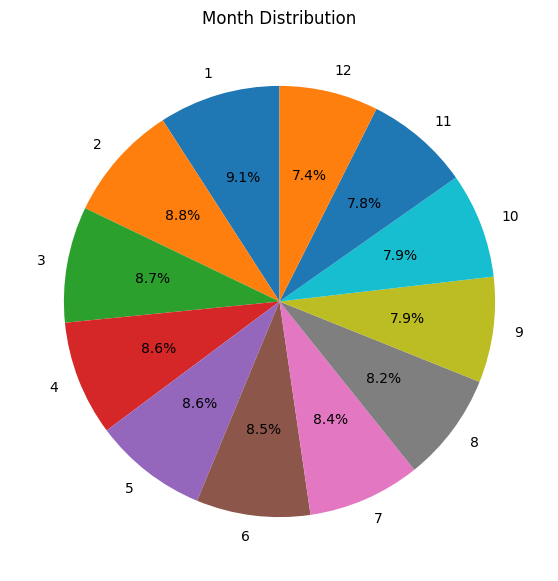

In [32]:
month_count=df['month'].value_counts()
labels=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(7,7))
plt.pie(month_count,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Month Distribution')
plt.show()

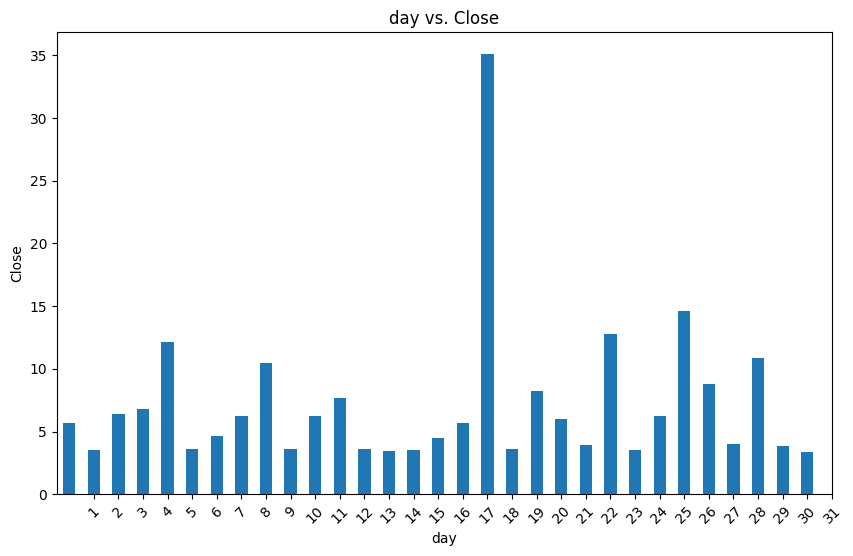

In [33]:
day_Close_mode = df.groupby('day')['Close'].agg(lambda x: x.mode()[0])
plt.figure(figsize=(10, 6))
day_Close_mode.plot(kind='bar')
plt.title('day vs. Close')  # Updated title
plt.xlabel('day')  # Updated x-axis label
plt.ylabel('Close')  # Updated y-axis label
plt.xticks(ticks=day_Close_mode.index, labels=day_Close_mode.keys(), rotation=45)  # replace numeric to string as original
plt.show()

<Axes: >

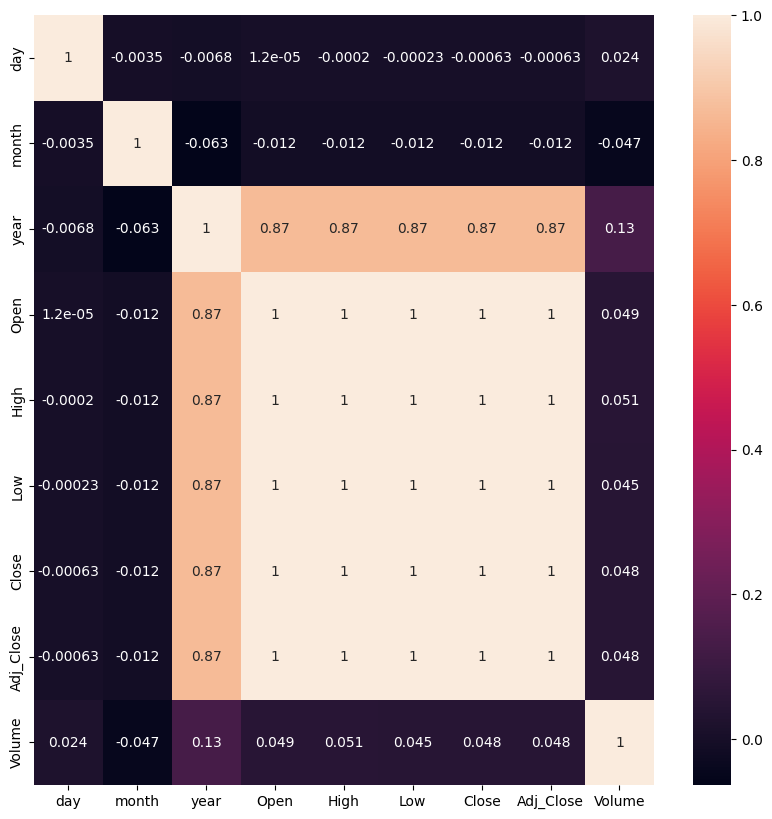

In [34]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True)

[Text(0.5, 1.0, 'Volume vs Close')]

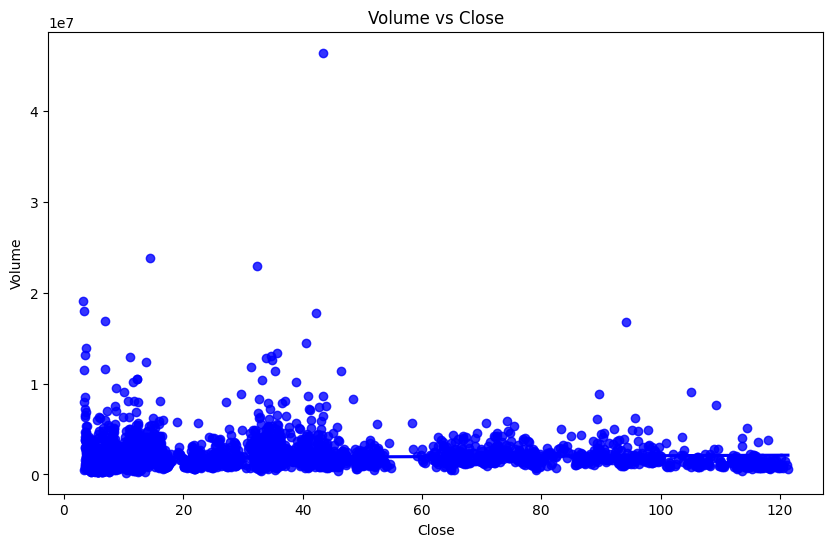

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, y = "Volume", x ="Close", color = "b").set(title = "Volume vs Close")

<Axes: ylabel='Close'>

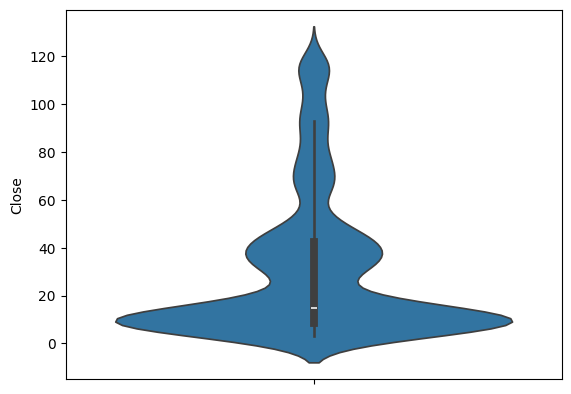

In [36]:
sns.violinplot(df.Close)

C:\Users\praveen\AppData\Local\Temp\ipykernel_41604\1393048044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Close)


<Axes: xlabel='Close', ylabel='Density'>

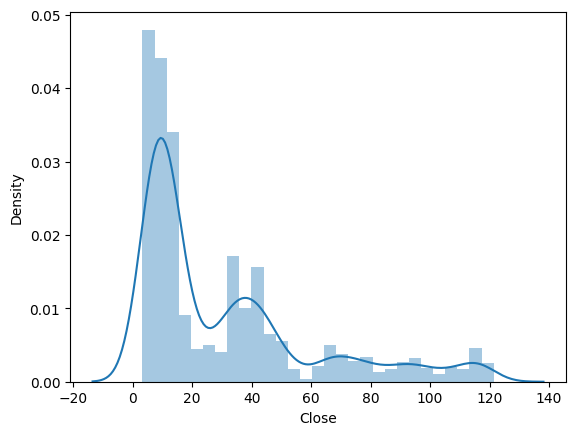

In [37]:
sns.distplot(df.Close)